# Sklearn Perceptron

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/placement.csv")

In [14]:
df.sample()

,cgpa,resume_score,placed
74,5.54,7.36,0


<Axes: xlabel='cgpa', ylabel='resume_score'>

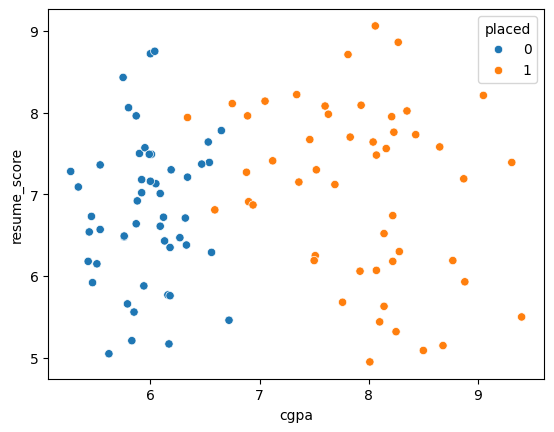

In [16]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])

In [21]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2:]

In [22]:
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [23]:
y

,placed
0,1
1,0
2,1
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [24]:
from sklearn.linear_model import Perceptron

p = Perceptron()

In [25]:
p.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [27]:
p.coef_

array([[ 40.26, -36.  ]])

In [33]:
p.intercept_

array([-25.])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

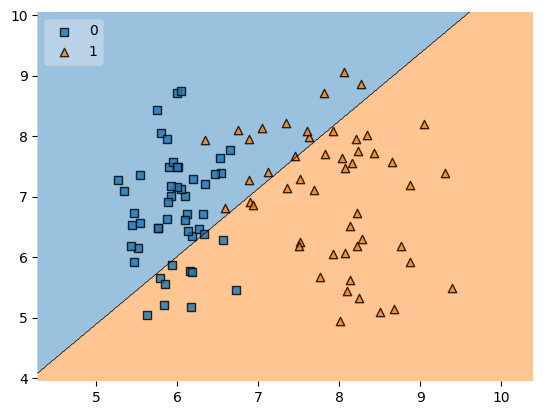

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values.reshape(100), clf=p, legend=2)

#  Perceptron Trick

In [45]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [46]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [47]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

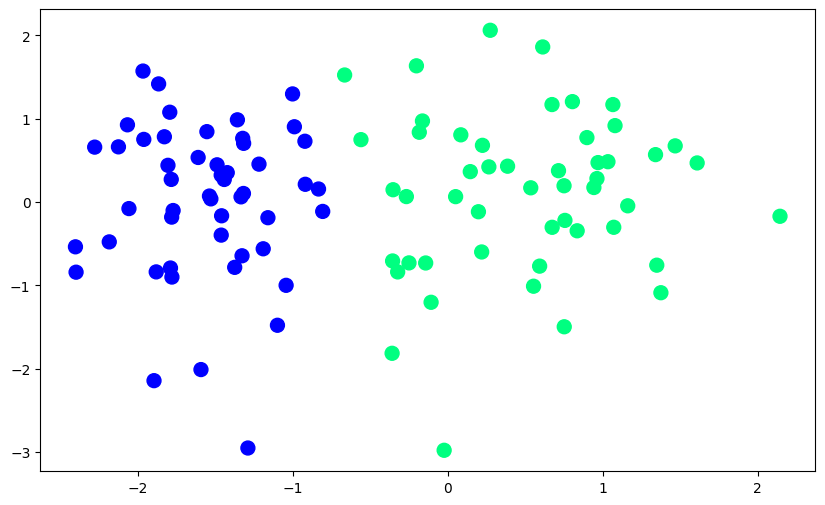

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [66]:
class CustomPerceptron:

  def __init__(self):
    self.lr  = 0.01
    self.epochs = 1000
    self.weights = []
    self.intercept = 1

  def _step(self, X):
    return 1 if np.dot(X, self.weights) > 0 else 0

  def fit(self, X, y):

    X = np.insert(X, 0, 1, axis=1)
    self.weights = np.ones(X.shape[1])

    for i in range(self.epochs):
      idx = np.random.randint(0, X.shape[0])
      y_pred = self._step(X[idx])
      self.weights += self.lr * (y[idx] - y_pred) * X[idx]

    self.intercept = self.weights[0]
    self.weights = self.weights[1:]

In [67]:
p = CustomPerceptron()

p.fit(X, y)

In [68]:
intercept_ = p.intercept

In [69]:
coef_ = p.weights

In [70]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [71]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

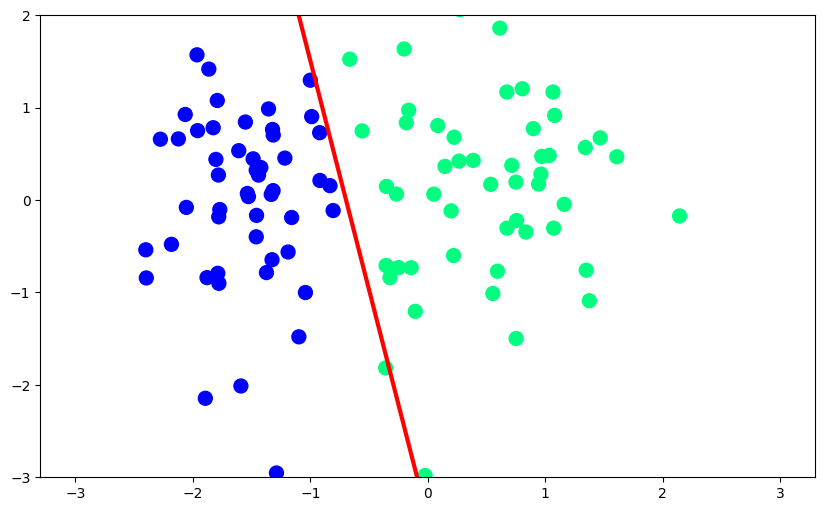

In [72]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)